# Color Identification using K-Means Algorithm



## We use KMeans algorithm to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.

## Importing libraries



In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Using OpenCV


The type of this input is <class 'numpy.ndarray'>
Shape: (333, 500, 3)


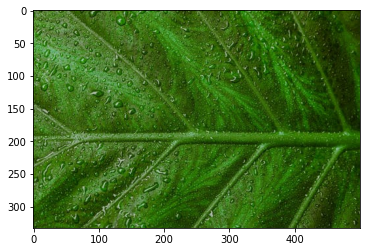

In [40]:
image = cv2.imread('sample.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

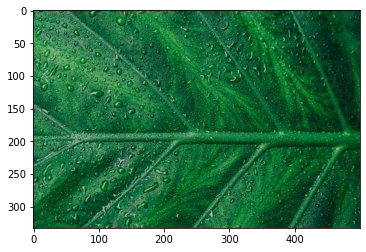

In [41]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

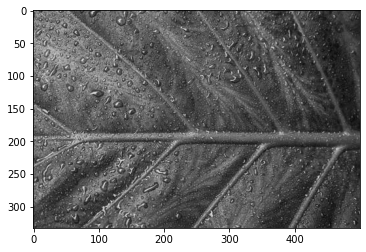

In [42]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

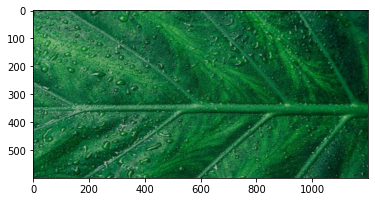

In [43]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## Color Identification



In [44]:
#Function to give us Hex value of colors
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [45]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [46]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clrs = KMeans(n_clusters = number_of_colors)
    labels = clrs.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    counts = dict(sorted(counts.items()))
    
    center_colors = clrs.cluster_centers_
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 17.30952712, 111.56239269,  56.95774746]),
 array([ 2.20784682, 55.03012927, 24.639665  ]),
 array([ 78.74911368, 151.98762918, 103.63634306]),
 array([ 54.17334176, 135.79374182,  85.30410439]),
 array([ 4.74475346, 77.2346016 , 34.81293721]),
 array([ 9.12319202, 95.38110723, 45.64109726]),
 array([114.23952549, 176.69384149, 132.9091368 ]),
 array([ 34.09641856, 122.57904684,  70.49979526])]

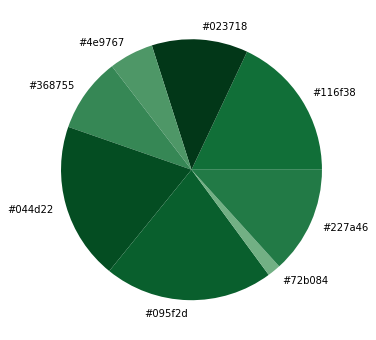

In [47]:
get_colors(get_image('sample.jpeg'), 8, True)

## Searching images using Color


In [48]:
IMAGE_DIRECTORY = 'img'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

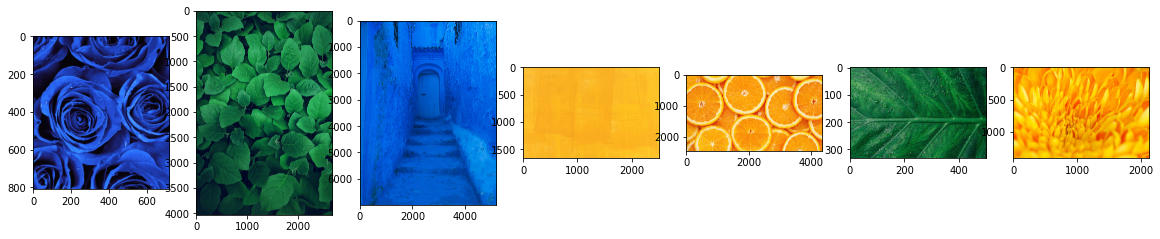

In [49]:
#Seeing all the images
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [50]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [51]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

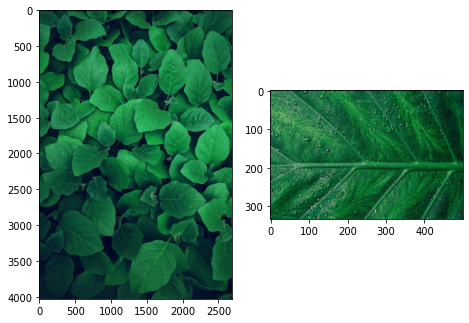

In [52]:
# Searching for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

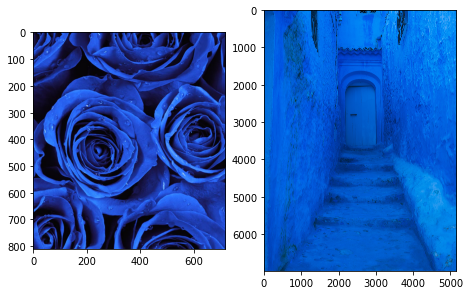

In [53]:
# Searching for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

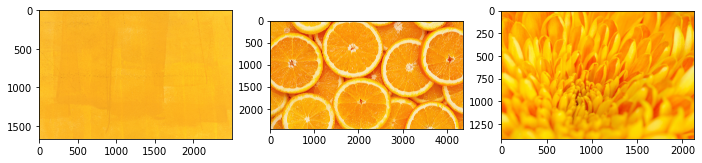

In [54]:
# Searching for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)